In [1]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# EDA

In [3]:
df=pd.read_csv('fetal_health.csv')

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.shape

(2126, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
corr_mat=df.corr()

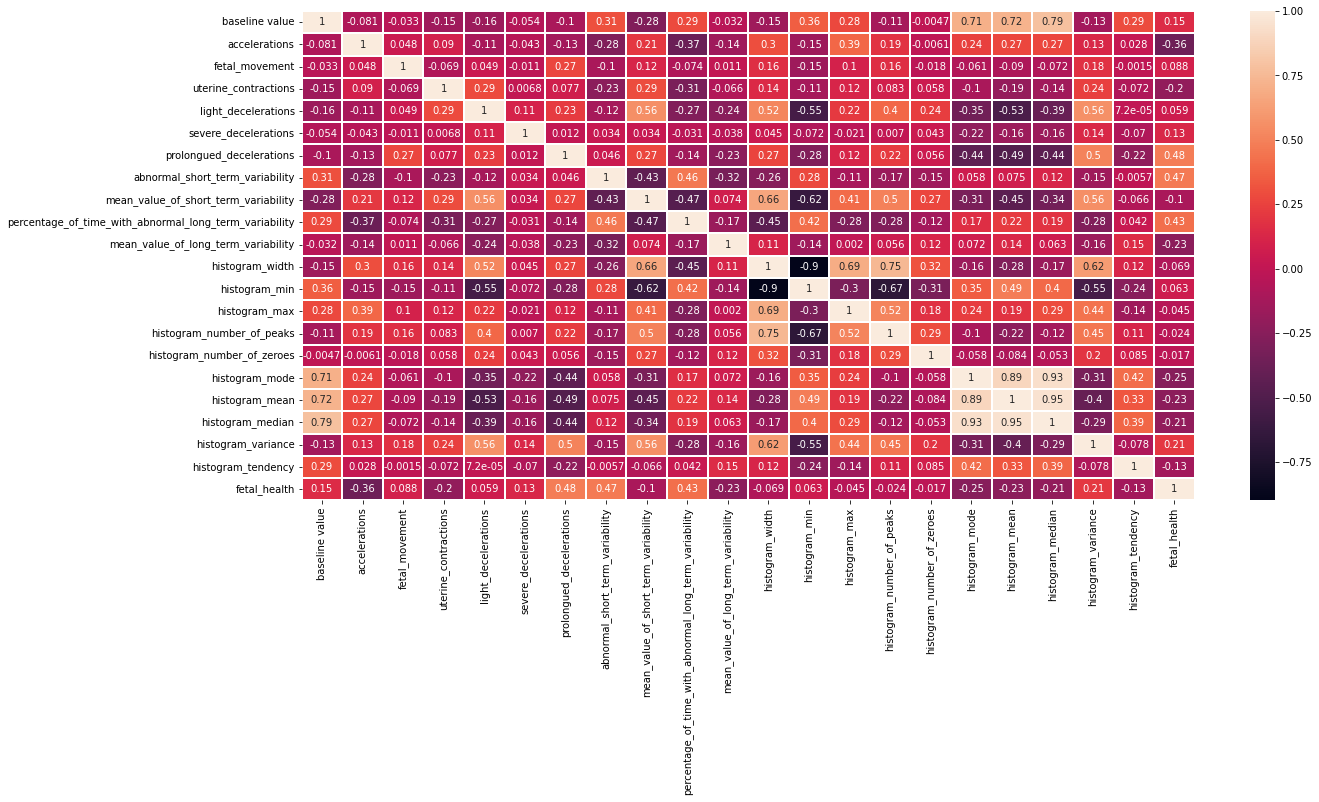

In [8]:
plt.figure(figsize=(20,9))
sns.heatmap(data=corr_mat,annot=True,linewidth=1,linecolor='w')

In [9]:
data1=df.copy()
data1.fetal_health=data1.fetal_health.astype('int')
data1.fetal_health=data1.fetal_health.replace([1,2,3],['Normal','Suspect','Pathological'])

([<matplotlib.patches.Wedge at 0x7f10feddfc90>,
 [Text(-0.8441562311892146, 0.7052660897451555, 'Normal'),
  Text(0.6344062353380878, -0.8986260226390926, 'Suspect'),
  Text(1.0630076905865578, -0.28286860863983, 'Pathological')],
 [Text(-0.4604488533759351, 0.38469059440644837, '77.85'),
  Text(0.3460397647298661, -0.4901596487122323, '13.88'),
  Text(0.5798223766835768, -0.15429196834899814, '8.28')])

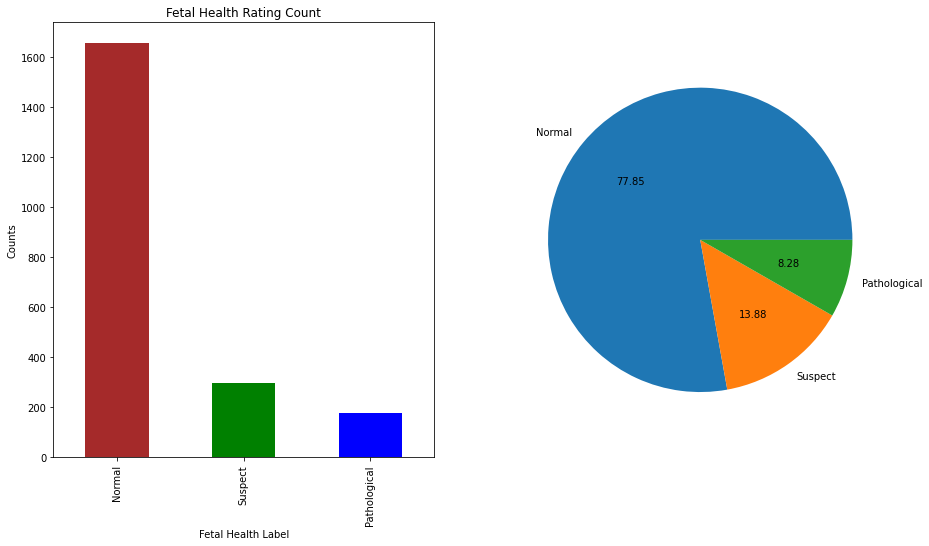

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(121)
data1.fetal_health.value_counts().plot(kind='bar',figsize=(15,8),color=['brown','g','b'])
plt.title('Fetal Health Rating Count')
plt.xlabel('Fetal Health Label')
plt.ylabel('Counts')
plt.subplot(122)
plt.pie(data1.fetal_health.value_counts(),labels=['Normal','Suspect','Pathological'],autopct='%.2f')

# KNN Modeling


In [11]:
X=df.drop(['fetal_health'],axis=1)
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [12]:
y=df['fetal_health']
y.head()

0    2.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: fetal_health, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [15]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier

In [16]:
def scores_knn(X,y,start,stop,step):
    scores_for_df=[]
    
    for i in range(start,stop,step):
        model=KNeighborsClassifier(n_neighbors=i)
        kf=KFold(n_splits=10,shuffle=True,random_state=10)

        
        cv_scores=cross_val_score(model,X,y)
        dict_row_score={'mean score':np.mean(cv_scores),'score std':np.std(cv_scores),'n_neighbors':i}
        scores_for_df.append(dict_row_score)
        
    df_scores=pd.DataFrame(scores_for_df)
    df_scores['lower limit']=df_scores['mean score']-df_scores['score std']
    df_scores['upper limit']=df_scores['mean score']+df_scores['score std']
    
    return df_scores

In [17]:
df_scores=scores_knn(X_train_std,y_train,1,21,1)

(0.7, 1.0)

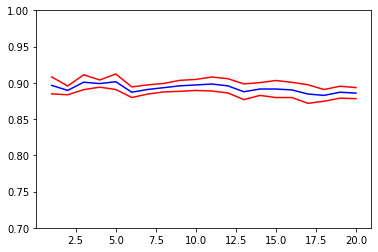

In [18]:
plt.plot(df_scores['n_neighbors'],df_scores['lower limit'],color='r')
plt.plot(df_scores['n_neighbors'],df_scores['mean score'],color='b')
plt.plot(df_scores['n_neighbors'],df_scores['upper limit'],color='r')
plt.ylim(0.7,1)

In [19]:
df_scores

,mean score,score std,n_neighbors,lower limit,upper limit
0,0.896485,0.011748,1,0.884737,0.908233
1,0.889588,0.006038,2,0.883550,0.895627
2,0.900871,0.010298,3,0.890573,0.911169
3,0.899000,0.004935,4,0.894065,0.903936
4,0.901516,0.010706,5,0.890810,0.912222
5,0.887084,0.007312,6,0.879772,0.894396
6,0.890842,0.006369,7,0.884473,0.897211
7,0.893356,0.005852,8,0.887504,0.899208
8,0.895856,0.007576,9,0.888279,0.903432
9,0.897110,0.007588,10,0.889522,0.904697


In [20]:
from imblearn.over_sampling import SMOTE
def SMOTE_f(X_train,y_train):
    sm=SMOTE(random_state=42)
    X_train_smo,y_train_smo=sm.fit_resample(X_train,y_train)
    return X_train_smo,y_train_smo

In [21]:
X_train_smo,y_train_smo=SMOTE_f(X_train,y_train)

In [23]:
df_scores=scores_knn(X_train_smo,y_train_smo,1,21,1)

(0.7, 1.0)

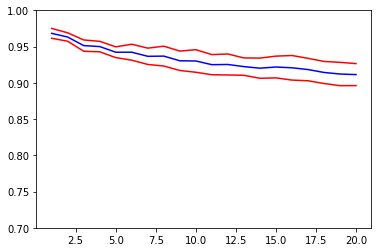

In [24]:
plt.plot(df_scores['n_neighbors'],df_scores['lower limit'],color='r')
plt.plot(df_scores['n_neighbors'],df_scores['mean score'],color='b')
plt.plot(df_scores['n_neighbors'],df_scores['upper limit'],color='r')
plt.ylim(0.7,1)

In [25]:
df_scores.loc[df_scores['mean score']==df_scores['mean score'].max()]

,mean score,score std,n_neighbors,lower limit,upper limit
0,0.968302,0.006791,1,0.961511,0.975093


In [36]:
best_k=df_scores.loc[df_scores['mean score']==df_scores['mean score'].max(),'n_neighbors']
best_k[0]

1

In [37]:
model=KNeighborsClassifier(n_neighbors=best_k[0])
model.fit(X_train_smo,y_train_smo)

KNeighborsClassifier(n_neighbors=1)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,model.predict(X_train))

1.0

In [39]:
y_pred=model.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.8984962406015038

Text(0.5, 15.0, 'Predicted Labels')

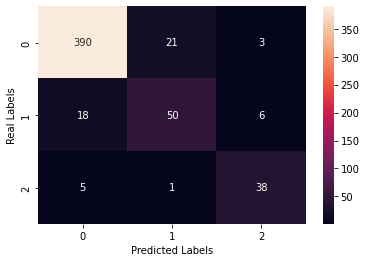

In [41]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')
plt.ylabel('Real Labels')
plt.xlabel('Predicted Labels')

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       414
         2.0       0.69      0.68      0.68        74
         3.0       0.81      0.86      0.84        44

    accuracy                           0.90       532
   macro avg       0.82      0.83      0.82       532
weighted avg       0.90      0.90      0.90       532



In [43]:
from sklearn.metrics import roc_curve

In [44]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from yellowbrick.classifier import ROCAUC

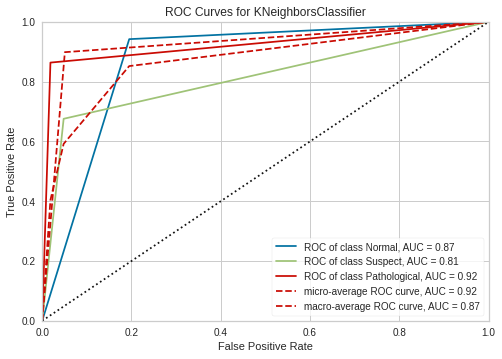

In [46]:
model=model
visualizer=ROCAUC(model,classes=['Normal','Suspect','Pathological'])
visualizer.fit(X_train_smo,y_train_smo)
visualizer.score(X_test,y_test)
visualizer.show()